In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings as w
w.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\porter_delivery.csv\\dataset.csv")
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [3]:
df.describe(include='all')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,197428,197421,197428,192668,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
unique,NaN,180985,178110,6743,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-02-11 19:50:43,2015-02-11 20:40:45,d43ab110ab2489d6b9b2caa394bf920f,american,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,5,937,19399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.978706,NaN,NaN,NaN,NaN,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,NaN,NaN,NaN,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,NaN,NaN,NaN,NaN,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,NaN,NaN,NaN,NaN,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000


In [4]:
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [5]:
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df["created_at"]=pd.to_datetime(df["created_at"])

In [6]:
df["delivery_time"] = df["actual_delivery_time"] - df["created_at"]

In [7]:
df["hour"] = df["created_at"].dt.hour
df["day"] = df["created_at"].dt.dayofweek

In [8]:
df["delivery_time"] = pd.to_timedelta(df['delivery_time']).dt.total_seconds() / 60
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,hour,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20,3
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21,1
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2,6


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(columns=["created_at","actual_delivery_time",'store_id'], inplace=True)

In [11]:
cat_cols = ["market_id", "order_protocol","store_primary_category","hour","day"]
for i in cat_cols:
  print(f"{i} : {df[i].unique()}")

market_id : [ 1.  2.  3.  4. nan  5.  6.]
order_protocol : [ 1.  2.  3.  4. nan  5.  6.  7.]
store_primary_category : ['american' 'mexican' nan 'indian' 'italian' 'sandwich' 'thai' 'cafe'
 'salad' 'pizza' 'chinese' 'singaporean' 'burger' 'breakfast'
 'mediterranean' 'japanese' 'greek' 'catering' 'filipino'
 'convenience-store' 'other' 'korean' 'vegan' 'asian' 'barbecue' 'fast'
 'dessert' 'smoothie' 'seafood' 'vietnamese' 'cajun' 'steak'
 'middle-eastern' 'soup' 'vegetarian' 'persian' 'nepalese' 'sushi'
 'latin-american' 'hawaiian' 'chocolate' 'burmese' 'british' 'pasta'
 'alcohol' 'dim-sum' 'peruvian' 'turkish' 'malaysian' 'ethiopian' 'afghan'
 'bubble-tea' 'german' 'french' 'caribbean' 'gluten-free' 'comfort-food'
 'gastropub' 'pakistani' 'moroccan' 'spanish' 'southern' 'tapas' 'russian'
 'brazilian' 'european' 'cheese' 'african' 'argentine' 'kosher' 'irish'
 'lebanese' 'belgian' 'indonesian' 'alcohol-plus-food']
hour : [22 21 20  2  3  0  1 19  4 23  5 18  6 17 16 15 14  7  8]
day : 

In [12]:
df.dropna(subset=["delivery_time"],inplace =True)

In [13]:
for i in cat_cols:
  a = df[i].mode()
  #print(a[0])
  df[i].fillna(a[0],inplace = True)

In [14]:
df.isnull().sum()

market_id                       0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
delivery_time                   0
hour                            0
day                             0
dtype: int64

best way to use target encoding 


In [15]:
category_means = df.groupby('store_primary_category')['delivery_time'].mean().to_dict()

df['store_primary_category'] = df['store_primary_category'].map(category_means)

In [16]:
df.store_primary_category.value_counts()

store_primary_category
47.948328    24159
50.869166    17320
44.546868    17098
47.175414    10958
44.760702    10059
             ...  
51.198148        9
54.991667        2
40.750000        2
34.133333        1
50.766667        1
Name: count, Length: 74, dtype: int64

In [17]:
# Group by 'market_id' and impute missing 'total_onshift_partners', 'total_busy_partners', and 'total_outstanding_orders' with the median of the group
df['total_onshift_partners'] = df.groupby('market_id')['total_onshift_partners'].transform(lambda x: x.fillna(x.median()))
df['total_busy_partners'] = df.groupby('market_id')['total_busy_partners'].transform(lambda x: x.fillna(x.median()))
df['total_outstanding_orders'] = df.groupby('market_id')['total_outstanding_orders'].transform(lambda x: x.fillna(x.median()))

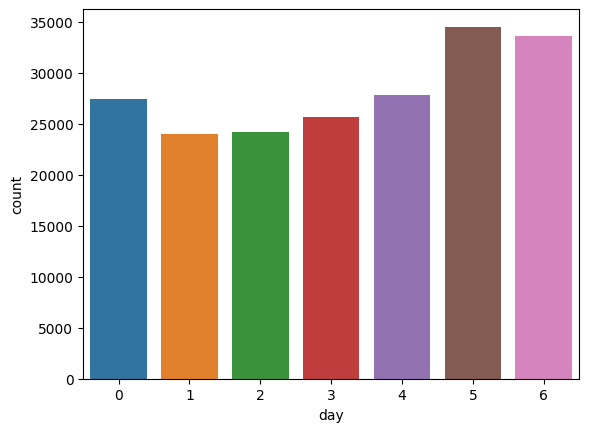

In [18]:
sns.countplot(x=df.day)
plt.show()

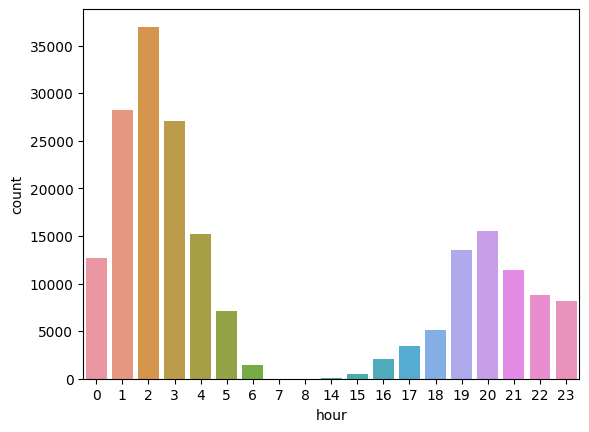

In [19]:
sns.countplot(x=df.hour)
plt.show()

In [20]:
Q3 = df['delivery_time'].quantile(0.75)
Q1 = df['delivery_time'].quantile(0.25)
IQR = Q3-Q1
df = df[(df['delivery_time'] > Q1 - 1.5*IQR) & (df['delivery_time'] < Q3 + 1.5*IQR)]

In [21]:
X = df.drop(columns = ["delivery_time"], axis = 1)
y = df["delivery_time"]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(152914, 13) (152914,)
(38229, 13) (38229,)


In [26]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
y_hat=regressor.predict(X_test)
mse=mean_squared_error(y_test,y_hat)
rmse=mse**.5
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
mae=mean_absolute_error(y_test,y_hat)
print("Mean Absolute Error : ",mae)
r2_score_RF = r2_score(y_test,y_hat)
print("r2_score : ",r2_score_RF)

Mean Squared Error :  161.74188787027242
Root Mean Squared Error :  12.717778417250098
Mean Absolute Error :  10.081870309486925
r2_score :  0.2571972938914874


In [28]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', kernel_initializer='normal', input_shape=(X_train.shape[1],)),
    Dense(516, activation='relu'),
    Dense(1024,activation='relu'),
    Dense(256,activation='relu'),
    Dense(1,activation='linear') 
])

In [30]:
adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])

history=model.fit(X_train,y_train,epochs=30,batch_size=512,verbose=1,validation_split=0.2)

Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - loss: 1104.1294 - mae: 23.4910 - mse: 1104.1301 - val_loss: 188.1866 - val_mae: 10.9625 - val_mse: 188.1998
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 184.8253 - mae: 10.8267 - mse: 184.8253 - val_loss: 179.2902 - val_mae: 10.4944 - val_mse: 179.3133
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 177.5709 - mae: 10.5896 - mse: 177.5708 - val_loss: 174.5899 - val_mae: 10.4446 - val_mse: 174.6055
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 177.2276 - mae: 10.5623 - mse: 177.2276 - val_loss: 173.3340 - val_mae: 10.4059 - val_mse: 173.3406
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 175.0150 - mae: 10.5180 - mse: 175.0151 - val_loss: 172.0942 - val_mae: 10.4485 - val_mse: 172.1016
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 175.9829 - mae: 10.5275 - mse: 175.9828 - val_loss: 172.1875 - val_mae: 10.3847 - val_mse: 172.2045
Epoch 7/30
239/239 ━━━━━━━━━━━

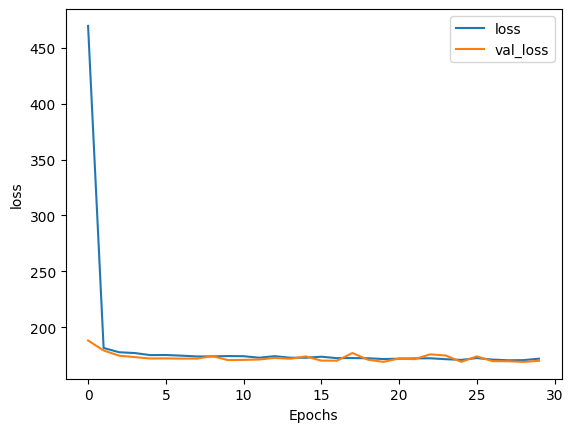

In [31]:
def plot_history(history,key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key,'val_'+key])
    plt.show()

plot_history(history,'loss')

In [33]:
mse=mean_squared_error(y_test,y_hat)
rmse=mse**.5
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
mae=mean_absolute_error(y_test,y_hat)
print("Mean Absolute Error : ",mae)
r2_score_RF = r2_score(y_test,y_hat)
print("r2_score : ",r2_score_RF)

Mean Squared Error :  161.74188787027242
Root Mean Squared Error :  12.717778417250098
Mean Absolute Error :  10.081870309486925
r2_score :  0.2571972938914874
